# DAEN 690 Capstone Project

## Import Libraries

In [208]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math

## Importing Dataset, Creating DataFrame, and Standardizing Data

### U.S. Dataset

In [209]:
#load US Dataset
df = pd.read_csv("USM00072712-data.txt", sep = '\t', header = None)

In [210]:
df

,0
0,#USM00072712 2021 01 01 00 2303 178 ncdc-nws ...
1,21 0 99364B 191 -32B 680 51 295 ...
2,20 8 98805 236B -31B 594 68 296 ...
3,20 46 96285 440B -45B 612 63 296 ...
4,10 154 92500 754B -73B 663 52 298 ...
...,...
395232,20 9925 1210 29467B -559B 30 239 58 ...
395233,20 9938 1194 29553B -557B 29 241 54 ...
395234,20 9945 1186 29596B -556B 30 241 51 ...
395235,20 9952 1177 29643B -555B 30 240 58 ...


In [211]:
#Assigning columns
id_ = []
year = []
month = []
day = []
hour =[]
reltime = []
numlev = []
p_src = []
np_src = []
lat = []
lon = []

lvltyp1 = []
lvltyp2 = []
etime = []
press = []
pflag = []
gph = []
zflag = []
temp = []
tflag = []
rh = []
dpdp = []
wdir = []
wspd = []

for line in df[0]:
    if "USM00072712" in line:
        id_.append(line[0:12].strip())
        year.append(line[13:17].strip())
        month.append(line[18:20].strip())
        day.append(line[21:23])
        hour.append(line[24:26])
        reltime.append(line[27:31])
        numlev.append(line[33:36])
        p_src.append(line[37:45])
        np_src.append(line[46:54])
        lat.append(line[56:62])
        lon.append(line[64:71])
        lvltyp1.append(None)
        lvltyp2.append(None)
        etime.append(None)
        press.append(None)
        pflag.append(None)
        gph.append(None)
        zflag.append(None)
        temp.append(None)
        tflag.append(None)
        rh.append(None)
        dpdp.append(None)
        wdir.append(None)
        wspd.append(None)
    else:
        id_.append(None)
        year.append(None)
        month.append(None)
        day.append(None)
        hour.append(None)
        reltime.append(None)
        numlev.append(None)
        p_src.append(None)
        np_src.append(None)
        lat.append(None)
        lon.append(None)
        lvltyp1.append(line[0:1].strip())
        lvltyp2.append(line[1:2].strip())
        etime.append(line[4:8].strip())
        press.append(line[9:15].strip())
        pflag.append(line[15:16].strip())
        gph.append(line[17:21].strip())
        zflag.append(line[21:22].strip())
        temp.append(line[22:27].strip())
        tflag.append(line[27:28].strip())
        rh.append(line[28:33].strip())
        dpdp.append(line[35:39].strip())
        wdir.append(line[41:45].strip())
        wspd.append(line[47:51].strip())

In [212]:
#Creating DataFrame
us_df = pd.DataFrame({
    'id_': id_,
    'year': year,
    'month': month,
    'day': day,
    'hour': hour,
    'reltime': reltime,
    'numlev': numlev,
    'p_src': p_src,
    'np_src': np_src,
    'lat': lat,
    'lon': lon,
    'lvltyp1': lvltyp1,
    'lvltyp2': lvltyp2,
    'etime': etime,
    'press': press,
    'pflag': pflag,
    'gph': gph,
    'zflag': zflag,
    'temp': temp,
    'tflag': tflag,
    'rh': rh,
    'dpdp': dpdp,
    'wdir': wdir,
    'wspd': wspd})

In [213]:
#Combining Headers with variables
us_df['id_'].fillna(method = 'ffill', inplace = True)
us_df['year'].fillna(method = 'ffill', inplace = True)
us_df['month'].fillna(method = 'ffill', inplace = True)
us_df['day'].fillna(method = 'ffill', inplace = True)
us_df['hour'].fillna(method = 'ffill', inplace = True)
us_df['reltime'].fillna(method = 'ffill', inplace = True)
us_df['numlev'].fillna(method = 'ffill', inplace = True)
us_df['p_src'].fillna(method = 'ffill', inplace = True)
us_df['np_src'].fillna(method = 'ffill', inplace = True)
us_df['lat'].fillna(method = 'ffill', inplace = True)
us_df['lon'].fillna(method = 'ffill', inplace = True)

In [214]:
#Drop rows with null values
us_df = us_df.dropna()

In [215]:
#us_df data types
print(us_df.dtypes)

id_        object
year       object
month      object
day        object
hour       object
reltime    object
numlev     object
p_src      object
np_src     object
lat        object
lon        object
lvltyp1    object
lvltyp2    object
etime      object
press      object
pflag      object
gph        object
zflag      object
temp       object
tflag      object
rh         object
dpdp       object
wdir       object
wspd       object
dtype: object


In [216]:
#Convert headers to the correct data type
us_df['id_'] = us_df['id_'].astype(str)
us_df['year'] = us_df['year'].astype(int)
us_df['month'] = us_df['month'].astype(int)
us_df['day'] = us_df['day'].astype(int)
us_df['hour'] = us_df['hour'].astype(int)
us_df['reltime'] = us_df['reltime'].astype(int)
us_df['numlev'] = us_df['numlev'].astype(int)
us_df['p_src'] = us_df['p_src'].astype(str)
us_df['np_src'] = us_df['np_src'].astype(str)
us_df['lat'] = us_df['lat'].astype(int)
us_df['lon'] = us_df['lon'].astype(int)

#Convert data records to the correct data type
us_df['lvltyp1'] = us_df['lvltyp1'].astype(int)
us_df['lvltyp2'] = us_df['lvltyp2'].astype(int)
us_df['etime'] = us_df['etime'].astype(int)
us_df['press'] = us_df['press'].astype(int)
us_df['pflag'] = us_df['pflag'].astype(str)
us_df['gph'] = us_df['gph'].astype(int)
us_df['zflag'] = us_df['zflag'].astype(str)
us_df['temp'] = us_df['temp'].astype(int)
us_df['tflag'] = us_df['tflag'].astype(str)
us_df['rh'] = us_df['rh'].astype(int)
us_df['dpdp'] = us_df['dpdp'].astype(int)
us_df['wdir'] = us_df['wdir'].astype(int)
us_df['wspd'] = us_df['wspd'].astype(int)


In [217]:
us_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,99364,B,191,,-32,B,680,51,295,36
2,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,98805,,236,B,-31,B,594,68,296,47
3,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,96285,,440,B,-45,B,612,63,296,96
4,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,92500,,754,B,-73,B,663,52,298,127
5,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,91875,,807,B,-78,B,676,49,299,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395232,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1210,,9467,B,-559,B,30,239,58,77
395233,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1194,,9553,B,-557,B,29,241,54,72
395234,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1186,,9596,B,-556,B,30,241,51,69
395235,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1177,,9643,B,-555,B,30,240,58,64


### Canada Dataset

In [218]:
#Loading Canadian Dataset
df2 = pd.read_csv("CAM00071701-data.txt", sep = '\t', header = None)

In [219]:
df2

,0
0,#CAM00071701 2021 01 26 12 1011 69 ncdc-gts ...
1,21 -9999 100800B-9999 -57B-9999 30 275 ...
2,10 -9999 100000 116B -63B-9999 19 285 ...
3,20 -9999 97700 -9999 -73B-9999 7 -9999 ...
4,20 -9999 94700 -9999 -39B-9999 10 -9999 ...
...,...
18003,30 -9999 -9999 4200 -9999 -9999 -9999 265 ...
18004,30 -9999 -9999 5100 -9999 -9999 -9999 275 ...
18005,30 -9999 -9999 5700 -9999 -9999 -9999 280 ...
18006,30 -9999 -9999 6000 -9999 -9999 -9999 280 ...


In [220]:
#Assigning columns
id_2 = []
year2 = []
month2 = []
day2 = []
hour2 =[]
reltime2 = []
numlev2 = []
p_src2 = []
np_src2 = []
lat2 = []
lon2 = []

lvltyp12 = []
lvltyp22 = []
etime2 = []
press2 = []
pflag2 = []
gph2 = []
zflag2 = []
temp2 = []
tflag2 = []
rh2 = []
dpdp2 = []
wdir2 = []
wspd2 = []

for line in df2[0]:
    if "CAM00071701" in line:
        id_2.append(line[0:12].strip())
        year2.append(line[13:17].strip())
        month2.append(line[18:20].strip())
        day2.append(line[21:23])
        hour2.append(line[24:26])
        reltime2.append(line[27:31])
        numlev2.append(line[33:36])
        p_src2.append(line[37:45])
        np_src2.append(line[46:54])
        lat2.append(line[56:62])
        lon2.append(line[64:71])
        lvltyp12.append(None)
        lvltyp22.append(None)
        etime2.append(None)
        press2.append(None)
        pflag2.append(None)
        gph2.append(None)
        zflag2.append(None)
        temp2.append(None)
        tflag2.append(None)
        rh2.append(None)
        dpdp2.append(None)
        wdir2.append(None)
        wspd2.append(None)
    else:
        id_2.append(None)
        year2.append(None)
        month2.append(None)
        day2.append(None)
        hour2.append(None)
        reltime2.append(None)
        numlev2.append(None)
        p_src2.append(None)
        np_src2.append(None)
        lat2.append(None)
        lon2.append(None)
        lvltyp12.append(line[0:1].strip())
        lvltyp22.append(line[1:2].strip())
        etime2.append(line[4:8].strip())
        press2.append(line[9:15].strip())
        pflag2.append(line[15:16].strip())
        gph2.append(line[17:21].strip())
        zflag2.append(line[21:22].strip())
        temp2.append(line[22:27].strip())
        tflag2.append(line[27:28].strip())
        rh2.append(line[28:33].strip())
        dpdp2.append(line[35:39].strip())
        wdir2.append(line[41:45].strip())
        wspd2.append(line[47:51].strip())

In [221]:
#Creating DataFrame
can_df = pd.DataFrame({
    'id_': id_2,
    'year': year2,
    'month': month2,
    'day': day2,
    'hour': hour2,
    'reltime': reltime2,
    'numlev': numlev2,
    'p_src': p_src2,
    'np_src': np_src2,
    'lat': lat2,
    'lon': lon2,
    'lvltyp1': lvltyp12,
    'lvltyp2': lvltyp22,
    'etime': etime2,
    'press': press2,
    'pflag': pflag2,
    'gph': gph2,
    'zflag': zflag2,
    'temp': temp2,
    'tflag': tflag2,
    'rh': rh2,
    'dpdp': dpdp2,
    'wdir': wdir2,
    'wspd': wspd2})

In [222]:
#Combining Headers with variables
can_df['id_'].fillna(method = 'ffill', inplace = True)
can_df['year'].fillna(method = 'ffill', inplace = True)
can_df['month'].fillna(method = 'ffill', inplace = True)
can_df['day'].fillna(method = 'ffill', inplace = True)
can_df['hour'].fillna(method = 'ffill', inplace = True)
can_df['reltime'].fillna(method = 'ffill', inplace = True)
can_df['numlev'].fillna(method = 'ffill', inplace = True)
can_df['p_src'].fillna(method = 'ffill', inplace = True)
can_df['np_src'].fillna(method = 'ffill', inplace = True)
can_df['lat'].fillna(method = 'ffill', inplace = True)
can_df['lon'].fillna(method = 'ffill', inplace = True)

In [223]:
#Drop rows with null values
can_df = can_df.dropna()

In [224]:
#Convert headers to the correct data type
can_df['id_'] = can_df['id_'].astype(str)
can_df['year'] = can_df['year'].astype(int)
can_df['month'] = can_df['month'].astype(int)
can_df['day'] = can_df['day'].astype(int)
can_df['hour'] = can_df['hour'].astype(int)
can_df['reltime'] = can_df['reltime'].astype(int)
can_df['numlev'] = can_df['numlev'].astype(int)
can_df['p_src'] = can_df['p_src'].astype(str)
can_df['np_src'] = can_df['np_src'].astype(str)
can_df['lat'] = can_df['lat'].astype(int)
can_df['lon'] = can_df['lon'].astype(int)

#Convert data records to the correct data type
can_df['lvltyp1'] = can_df['lvltyp1'].astype(int)
can_df['lvltyp2'] = can_df['lvltyp2'].astype(int)
can_df['etime'] = can_df['etime'].astype(int)
can_df['press'] = can_df['press'].astype(int)
can_df['pflag'] = can_df['pflag'].astype(str)
can_df['gph'] = can_df['gph'].astype(int)
can_df['zflag'] = can_df['zflag'].astype(str)
can_df['temp'] = can_df['temp'].astype(int)
can_df['tflag'] = can_df['tflag'].astype(str)
can_df['rh'] = can_df['rh'].astype(int)
can_df['dpdp'] = can_df['dpdp'].astype(int)
can_df['wdir'] = can_df['wdir'].astype(int)
can_df['wspd'] = can_df['wspd'].astype(int)

In [225]:
can_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,100800,B,9999,,-57,B,-9999,30,275,31
2,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,100000,,116,B,-63,B,-9999,19,285,46
3,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,97700,,9999,,-73,B,-9999,7,9999,9999
4,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,94700,,9999,,-39,B,-9999,10,9999,9999
5,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,93100,,9999,,-51,B,-9999,0,9999,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18003,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,4200,,-9999,,-9999,9999,265,185
18004,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,5100,,-9999,,-9999,9999,275,195
18005,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,5700,,-9999,,-9999,9999,280,324
18006,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,6000,,-9999,,-9999,9999,280,340


## Preprocessing

## Functions

### Temperature converts to Fahrenheit

In [226]:
def temp_to_fahrenheit(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return ((celcius_input/10)*(9/5)) + 32

### Temperature converts to Kelvin

In [227]:
def temp_to_kelvin(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return (celcius_input/10) + 273.15

### Relative Humidity to Ice

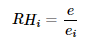
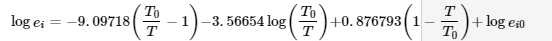

In [228]:
 def relative_humidity_to_ice(t, rh):
    if rh == -9999:
        return -9999
    elif rh == -8888:
        return -8888
    else:
        rh_std = rh / 100 # Standardizing to have rh presented in precent to hundreths
        to = 273.16 #ice-point (triple point) temperature
        e_i0 = 6.1173 #ice-point pressure

        #ei is saturated water vapor pressure over ice
        log_ei = -9.09718 * (to / t - 1) - 3.56654 * math.log(to / t) + 0.876793 * (1 - t / to) + math.log(e_i0)
        ei = math.exp(log_ei)

        #e is Actual Water Vapor Pressure. This is calculated by multiplying 
        #relative humidity by saturated vapor pressure over ice.
        e = rh_std * ei 

        #returning relative humidity to ice
        return e / ei
        

### Pressure to Pressure Altitude

In [229]:
def calculate_pressure_altitude(pressure):
    if pressure == -9999:
        return -9999    
    pressure /= 100

    pressure_altitude = (1 - (pressure / 1013.25) ** 0.190284) * 145366.45
    return round(pressure_altitude, 2)

### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 4,300  feet

## Adding Conversions to DataFrames

### Adding Conversions to U.S. DataFrame

In [230]:
#Fahrenheit
fahrenheit = []

for line in us_df['temp']:
    fahrenheit.append(temp_to_fahrenheit(line))

us_df['temp_f'] = fahrenheit

#Kelvins
kelvin = []
for line in us_df['temp']:
    kelvin.append(temp_to_kelvin(line))

us_df['temp_k'] = kelvin

#Relative Humidity to Ice
rhi = []
for index, row in us_df.iterrows():
    temp_k = row['temp_k']
    rh = row['rh']
    rhi.append(relative_humidity_to_ice(temp_k, rh))

us_df['rhi'] = rhi

#Pressure Altitude
press_alt = []

for line in us_df['press']:
    press_alt.append(calculate_pressure_altitude(line))

us_df['press_alt'] = press_alt


In [231]:
us_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,temp,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt
1,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,-32,B,680,51,295,36,26.24,269.95,6.80,539.58
2,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,-31,B,594,68,296,47,26.42,270.05,5.94,694.97
3,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,-45,B,612,63,296,96,23.90,268.65,6.12,1404.45
4,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,-73,B,663,52,298,127,18.86,265.85,6.63,2498.86
5,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,-78,B,676,49,299,124,17.96,265.35,6.76,2683.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395232,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,-559,B,30,239,58,77,-68.62,217.25,0.30,82768.35
395233,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,-557,B,29,241,54,72,-68.26,217.45,0.29,82926.71
395234,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,-556,B,30,241,51,69,-68.08,217.55,0.30,83006.53
395235,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,-555,B,30,240,58,64,-67.90,217.65,0.30,83096.86


### Adding Conversions to Canada DataFrame

In [232]:
#Temp
can_fahrenheit = []

for line in can_df['temp']:
    can_fahrenheit.append(temp_conversion(line))

can_df['temp_f'] = can_fahrenheit

#Kelvins
can_kelvin = []
for line in can_df['temp']:
    can_kelvin.append(temp_to_kelvin(line))

can_df['temp_k'] = can_kelvin

#Relative Humidity to Ice
can_rhi = []
for index, row in can_df.iterrows():
    can_temp_k = row['temp_k']
    can_rh = row['rh']
    can_rhi.append(relative_humidity_to_ice(can_temp_k, can_rh))

can_df['rhi'] = can_rhi

#Pressure Altitude
can_press_alt = []

for line in can_df['press']:
    can_press_alt.append(calculate_pressure_altitude(line))

can_df['press_alt'] = can_press_alt

In [233]:
can_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,temp,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt
1,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,-57,B,-9999,30,275,31,21.74,267.45,-9999,143.62
2,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,-63,B,-9999,19,285,46,20.66,266.85,-9999,363.64
3,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,-73,B,-9999,7,9999,9999,18.86,265.85,-9999,1004.25
4,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,-39,B,-9999,10,9999,9999,24.98,269.25,-9999,1858.43
5,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,-51,B,-9999,0,9999,9999,22.82,268.05,-9999,2322.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18003,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,-9999,9999,265,185,-1767.82,-9999.00,-9999,-9999.00
18004,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,-9999,9999,275,195,-1767.82,-9999.00,-9999,-9999.00
18005,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,-9999,9999,280,324,-1767.82,-9999.00,-9999,-9999.00
18006,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,-9999,9999,280,340,-1767.82,-9999.00,-9999,-9999.00


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 4,300)

In [234]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
new_us_df = us_df[(us_df['year'] == 2023) & (us_df['press_alt'] <= 4300)]

In [235]:
#Filter and create new DataFrame. New Canada DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
new_can_df = can_df[(can_df['year'] == 2023) & (can_df['press_alt'] <= 4300)]

## Finalized Cleaned Datasets for Analysis

In [236]:
new_us_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,temp,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt
240922,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,47,B,970,4,6,26,40.46,277.85,9.70,999.75
240923,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,49,B,927,11,49,83,40.82,278.05,9.27,1499.89
240924,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,52,B,963,5,52,83,41.36,278.35,9.63,1580.73
240925,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,52,B,1000,0,60,82,41.36,278.35,10.00,1819.52
240926,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,47,B,968,5,76,57,40.46,277.85,9.68,2374.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375855,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,-9999,,-9999,9999,75,21,-9999.00,-9999.00,-9999.00,-9999.00
375856,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,-9999,,-9999,9999,90,41,-9999.00,-9999.00,-9999.00,-9999.00
375857,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,-9999,,-9999,9999,100,31,-9999.00,-9999.00,-9999.00,-9999.00
375858,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,-9999,,-9999,9999,45,15,-9999.00,-9999.00,-9999.00,-9999.00


In [237]:
new_can_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,temp,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt
17106,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,-7,A,-9999,12,40,72,30.74,272.45,-9999,225.96
17107,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,-13,A,-9999,14,40,82,29.66,271.85,-9999,363.64
17108,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,-47,A,-9999,0,9999,9999,23.54,268.45,-9999,2089.90
17109,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,-43,A,-9999,3,60,314,24.26,268.85,-9999,2498.86
17110,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,-45,A,-9999,0,9999,9999,23.90,268.65,-9999,2883.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,-9999,,-9999,9999,215,180,-1767.82,-9999.00,-9999,-9999.00
17951,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,-9999,,-9999,9999,220,211,-1767.82,-9999.00,-9999,-9999.00
17952,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,-9999,,-9999,9999,250,201,-1767.82,-9999.00,-9999,-9999.00
17953,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,-9999,,-9999,9999,240,216,-1767.82,-9999.00,-9999,-9999.00
